# <span style="color:blue">Good and bad controls</span>

- Juan José Tang
- Ursula Cotrina
- Victoria Olivera

In [ ]:
# using Pkg
# Pkg.add("StatsPlots")
# Pkg.add("GraphRecipes")
# Pkg.add("Gadfly")
# Pkg.add("Conda")
# Pkg.add("Random")
# Pkg.add("DataTables")
# Pkg.add("TypedTables")
# Pkg.add("MacroTools")
# Pkg.add("TexTables")
# Pkg.add("PlotlyJS")
# Pkg.add("Images")
# Pkg.add("FileIO")
# Pkg.add("ClinicalTrialUtilities")
# Pkg.add("KernelDensity")
# Conda.pip_interop(true)
# Conda.pip("install", "webio_jupyter_extension")

In [1]:
using Pkg
# using Random
# using GLM, StatsModels
# using DataTables
# using DelimitedFiles, DataFrames, Lasso
# using FilePaths
# using StatsModels, Combinatorics
# using CategoricalArrays
# using StatsBase, Statistics
# using TypedTables
# using MacroTools
# using NamedArrays
# using PrettyTables # Dataframe or Datatable to latex
# using TexTables # pretty regression table and tex outcome
# using Conda
# using Images, FileIO
# using ClinicalTrialUtilities
# using PlotlyJS
# using KernelDensity

In [19]:
import Pkg

In [26]:
#Pkg.add("PlotlyJS")
#Pkg.add("RegressionTables")
#Pkg.add("StructuralCausalModels")
#Pkg.add("CausalInference")
#Pkg.add("LightGraphs")
#Pkg.add("Graphs")
#Pkg.add("TikzGraphs")
#Pkg.add("TikzPictures")
#import Pkg; Pkg.add("AbstractValGraph") #esto no funciona
#Pkg.add("GraphPlot")
#Pkg.add("GraphRecipes")
#Pkg.add("PyPlot")

   Resolving package versions...
   Installed PyPlot ─ v2.10.0
    Updating `C:\Users\Pelusa\.julia\environments\v1.7\Project.toml`
  [d330b81b] + PyPlot v2.10.0
    Updating `C:\Users\Pelusa\.julia\environments\v1.7\Manifest.toml`
  [d330b81b] + PyPlot v2.10.0
Precompiling project...
  ✓ PyPlot
  1 dependency successfully precompiled in 4 seconds (296 already precompiled)


In [7]:
using Random
using DataFrames
#using PlotlyJS

WebIO._IJuliaInit()

In [21]:
using CausalInference
using TikzGraphs
using TikzPictures
using Graphs
using GraphPlot

In [24]:
using GraphRecipes
using Plots
using LightGraphs

## Model 1

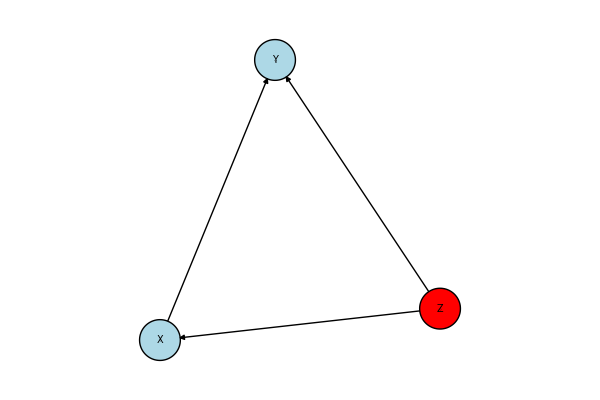

In [69]:
using GraphRecipes, Plots
g = [0 1 1;
     0 0 1;
     0 0 0]

graphplot(g, names=["Z","X","Y"], curvature_scalar=0, nodesize=0.2, nodeshape=:circle, nodecolor = [colorant"red",colorant"lightblue",colorant"lightblue"])

In [3]:

using Distributions, DataFrames, GLM, StatsModels, LinearAlgebra, GLM, Statistics, Random, RegressionTables, Plots

In [5]:
Random.seed!(123)
N = 1000 # number of data points

# define simple linear model with added noise
Z = rand(Normal(0, 1), N)
X = 0.5*Z + rand(Normal(0, 1), N)
Y = 3*X + 2*Z + rand(Normal(0, 1), N) #Real effect is 3.
tb=DataFrame(Z=Z,X=X,Y=Y)

,Z,X,Y
,Float64,Float64,Float64
1,-0.645731,-0.0541318,-0.341112
2,-1.46325,-1.40056,-6.9272
3,-1.6236,-1.58863,-8.26582
4,-0.217665,-0.368401,-0.649745
5,0.492246,-1.55051,-2.59495
6,0.98098,-1.01321,-1.30883
7,0.0799568,-0.383582,-0.927791
8,1.54912,0.189898,2.78672
9,-1.34161,-1.86768,-7.46473


In [6]:
# Regressions
no_control = lm(@formula(Y ~ X), tb)        #Wrong, not controlling by the confounder Z
using_control = lm(@formula(Y ~ X+Z), tb)    # Correct

# Summary results
regtable(no_control , using_control, renderSettings = asciiOutput(), estimformat = "%02.3f")


---------------------------------
                       Y         
              -------------------
                   (1)        (2)
---------------------------------
(Intercept)     -0.024      0.046
               (0.066)    (0.032)
X             3.906***   2.999***
               (0.060)    (0.034)
Z                        1.984***
                          (0.036)
---------------------------------
Estimator          OLS        OLS
---------------------------------
N                1,000      1,000
R2               0.807      0.953
---------------------------------




## Model 2

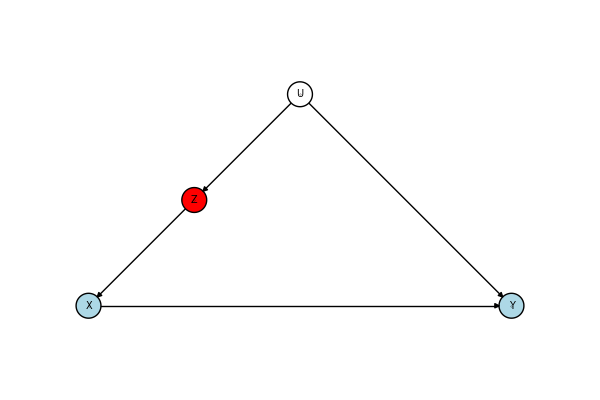

In [158]:
using GraphRecipes, Plots
g = [0 1 0 0;
     0 0 1 0;
     0 0 0 0;
     1 0 1 0]

graphplot(g, names=["Z","X","Y","U"], curvature_scalar=0, nodesize=0.2, nodeshape=:circle, nodecolor = [colorant"red",colorant"lightblue",colorant"lightblue",colorant"white"],x=[-0.5,-1,1,0],y=[-0.5,-1,-1,0])

In [7]:
Random.seed!(123)
N = 1000 # number of data points

# define simple linear model with added noise
U = rand(Normal(0, 1), N)
Z = 2*U + rand(Normal(0, 1), N)
X = 0.5*Z + rand(Normal(0, 1), N)
Y= 3*X + 2*U + rand(Normal(0, 1), N)
tb=DataFrame(U=U,Z=Z,X=X,Y=Y)

,U,Z,X,Y
,Float64,Float64,Float64,Float64
1,-0.645731,-1.02273,0.601381,0.702346
2,-1.46325,-3.59543,-1.59674,-7.75462
3,-1.6236,-4.02404,-2.26473,-9.62877
4,-0.217665,-0.694899,0.543338,-0.198605
5,0.492246,-0.812141,0.666015,2.67747
6,0.98098,0.458256,-0.00201823,2.96958
7,0.0799568,-0.263647,-0.0687812,-1.91276
8,1.54912,2.51359,0.375571,5.69266
9,-1.34161,-3.88009,-1.11852,-7.44883


In [8]:
# Regressions
no_control = lm(@formula(Y ~ X), tb)        #Wrong, not controlling by the confounder Z
using_control = lm(@formula(Y ~ X+Z), tb)    # Correct

# Summary results
regtable(no_control , using_control, renderSettings = asciiOutput(), estimformat = "%02.3f")


---------------------------------
                       Y         
              -------------------
                   (1)        (2)
---------------------------------
(Intercept)     -0.112     -0.043
               (0.060)    (0.042)
X             3.926***   2.941***
               (0.039)    (0.041)
Z                        0.885***
                          (0.027)
---------------------------------
Estimator          OLS        OLS
---------------------------------
N                1,000      1,000
R2               0.909      0.956
---------------------------------




In this case, it is necessary to control for Z because it blocks the back-door path from X to due to U. If we don't include Z, the estimation is biased.

## Model 3

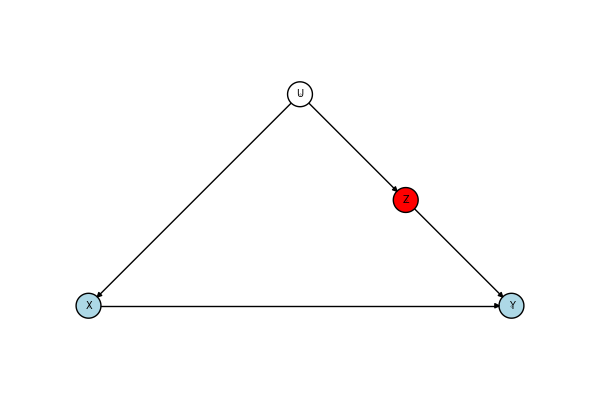

In [161]:
using GraphRecipes, Plots
g = [0 0 1 0;
     0 0 1 0;
     0 0 0 0;
     1 1 0 0]

graphplot(g, names=["Z","X","Y","U"], curvature_scalar=0, nodesize=0.2, nodeshape=:circle, nodecolor = [colorant"red",colorant"lightblue",colorant"lightblue",colorant"white"],x=[0.5,-1,1,0],y=[0.5,0,0,1])

In [9]:
Random.seed!(123)
N = 1000 # number of data points

# define simple linear model with added noise
U = rand(Normal(0, 1), N)
Z = 2*U + rand(Normal(0, 1), N)
X = 0.5*U + rand(Normal(0, 1), N)
Y= 3*X + 2*Z + rand(Normal(0, 1), N)
tb=DataFrame(U=U,Z=Z,X=X,Y=Y)

,U,Z,X,Y
,Float64,Float64,Float64,Float64
1,-0.645731,-1.02273,0.78988,0.513847
2,-1.46325,-3.59543,-0.530651,-8.82072
3,-1.6236,-4.02404,-1.06452,-10.829
4,-0.217665,-0.694899,0.781955,-0.437222
5,0.492246,-0.812141,1.31821,2.02528
6,0.98098,0.458256,0.259344,2.70822
7,0.0799568,-0.263647,0.103021,-2.08456
8,1.54912,2.51359,-0.106659,6.17489
9,-1.34161,-3.88009,0.150726,-8.71807


In [10]:
# Regressions
no_control = lm(@formula(Y ~ X), tb)        
using_control = lm(@formula(Y ~ X+Z), tb)    

# Summary results
regtable(no_control , using_control, renderSettings = asciiOutput(), estimformat = "%02.3f")


---------------------------------
                       Y         
              -------------------
                   (1)        (2)
---------------------------------
(Intercept)     -0.185     -0.019
               (0.139)    (0.032)
X             4.585***   2.946***
               (0.122)    (0.031)
Z                        2.042***
                          (0.015)
---------------------------------
Estimator          OLS        OLS
---------------------------------
N                1,000      1,000
R2               0.585      0.978
---------------------------------




## Model 4: good control

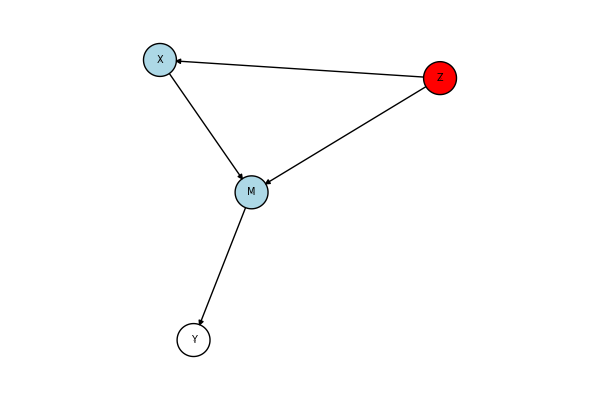

In [120]:
using GraphRecipes, Plots
g = [0 1 1 0;
     0 0 1 0;
     0 0 0 1;
     0 0 0 0]

graphplot(g, names=["Z","X","M","Y"], curvature_scalar=0, nodesize=0.2, nodeshape=:circle, nodecolor = [colorant"red",colorant"lightblue",colorant"lightblue",colorant"white"],method=:spring,arrow=1)

In [11]:
Random.seed!(123)
N = 1000 # number of data points

# define simple linear model with added noise
Z = rand(Normal(0, 1), N)
X = 0.5*Z + rand(Normal(0, 1), N)
M= 1.5*Z + 0.5*X + rand(Normal(0, 1), N)
Y= 4*M + rand(Normal(0, 1), N)

tb=DataFrame(Z=Z,X=X,M=M,Y=Y)

,Z,X,M,Y
,Float64,Float64,Float64,Float64
1,-0.645731,-0.0541318,0.117083,0.657996
2,-1.46325,-1.40056,-2.69418,-10.8146
3,-1.6236,-1.58863,-3.48244,-13.5171
4,-0.217665,-0.368401,0.380089,0.127068
5,0.492246,-1.55051,1.0352,3.83574
6,0.98098,-1.01321,0.733717,3.94854
7,0.0799568,-0.383582,-0.00881359,-1.90158
8,1.54912,0.189898,1.53741,7.61736
9,-1.34161,-1.86768,-2.12472,-9.90896


In [12]:
# Regressions
no_control = lm(@formula(Y ~ X), tb)        
using_control = lm(@formula(Y ~ X+Z), tb)    

# Summary results
regtable(no_control , using_control, renderSettings = asciiOutput(), estimformat = "%02.3f")


---------------------------------
                       Y         
              -------------------
                   (1)        (2)
---------------------------------
(Intercept)     -0.047      0.163
               (0.216)    (0.131)
X             4.769***   2.037***
               (0.199)    (0.138)
Z                        5.972***
                          (0.145)
---------------------------------
Estimator          OLS        OLS
---------------------------------
N                1,000      1,000
R2               0.365      0.766
---------------------------------




## Model 5: good control

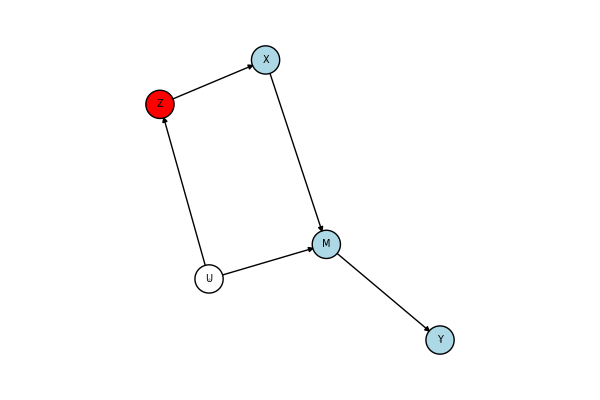

In [119]:
using GraphRecipes, Plots
g = [0 1 0 0 0;
     0 0 1 0 0;
     0 0 0 1 0;
     0 0 0 0 0;
     1 0 1 0 0]

graphplot(g, names=["Z","X","M","Y","U"], curvature_scalar=0, nodesize=0.2, nodeshape=:circle, nodecolor = [colorant"red",colorant"lightblue",colorant"lightblue",colorant"lightblue",colorant"white"],method=:spring,arrow=1)

In [13]:
Random.seed!(123)
N = 1000 # number of data points

# define simple linear model with added noise
U = rand(Normal(0, 1), N)
Z = 2*U + rand(Normal(0, 1), N)
X = 0.5*Z + rand(Normal(0, 1), N)
M = 1.5*U + 0.5*X + rand(Normal(0, 1), N)
Y = 4*M + rand(Normal(0, 1), N)

tb=DataFrame(U=U,Z=Z,X=X,M=M,Y=Y)

,U,Z,X,M,Y
,Float64,Float64,Float64,Float64,Float64
1,-0.645731,-1.02273,0.601381,-0.478242,-0.680694
2,-1.46325,-3.59543,-1.59674,-3.03114,-12.7534
3,-1.6236,-4.02404,-2.26473,-3.15513,-12.8977
4,-0.217665,-0.694899,0.543338,-1.44812,-6.24713
5,0.492246,-0.812141,0.666015,0.766313,2.93599
6,0.98098,0.458256,-0.00201823,2.48413,10.1542
7,0.0799568,-0.263647,-0.0687812,-1.78078,-8.10506
8,1.54912,2.51359,0.375571,3.97917,17.0418
9,-1.34161,-3.88009,-1.11852,-3.98174,-15.2188


In [14]:
# Regressions
no_control = lm(@formula(Y ~ X), tb)        
using_control = lm(@formula(Y ~ X+Z), tb)    

# Summary results
regtable(no_control , using_control, renderSettings = asciiOutput(), estimformat = "%02.3f")


---------------------------------
                       Y         
              -------------------
                   (1)        (2)
---------------------------------
(Intercept)     -0.346     -0.136
               (0.202)    (0.154)
X             4.781***   1.769***
               (0.133)    (0.151)
Z                        2.707***
                          (0.100)
---------------------------------
Estimator          OLS        OLS
---------------------------------
N                1,000      1,000
R2               0.563      0.747
---------------------------------




## Model 6: good control

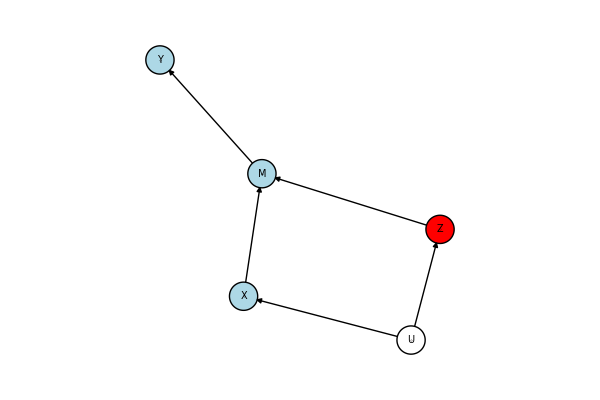

In [121]:
using GraphRecipes, Plots
g = [0 0 1 0 0;
     0 0 1 0 0;
     0 0 0 1 0;
     0 0 0 0 0;
     1 1 0 0 0]

graphplot(g, names=["Z","X","M","Y","U"], curvature_scalar=0, nodesize=0.2, nodeshape=:circle, nodecolor = [colorant"red",colorant"lightblue",colorant"lightblue",colorant"lightblue",colorant"white"],method=:spring,arrow=1)

In [15]:
Random.seed!(123)
N = 1000 # number of data points

# define simple linear model with added noise
U = rand(Normal(0, 1), N)
Z = 2*U + rand(Normal(0, 1), N)
X = 0.5*U + rand(Normal(0, 1), N)
M = 1.5*Z + 0.5*X + rand(Normal(0, 1), N)
Y = 4*M + rand(Normal(0, 1), N)

tb=DataFrame(U=U,Z=Z,X=X,M=M,Y=Y)

,U,Z,X,M,Y
,Float64,Float64,Float64,Float64,Float64
1,-0.645731,-1.02273,0.78988,-0.949488,-2.56568
2,-1.46325,-3.59543,-0.530651,-5.69637,-23.4144
3,-1.6236,-4.02404,-1.06452,-6.15568,-24.8999
4,-0.217665,-0.694899,0.781955,-2.04466,-8.6333
5,0.492246,-0.812141,1.31821,-0.86417,-3.58594
6,0.98098,0.458256,0.259344,1.83073,7.54062
7,0.0799568,-0.263647,0.103021,-2.21029,-9.82308
8,1.54912,2.51359,-0.106659,5.18475,21.8641
9,-1.34161,-3.88009,0.150726,-7.15484,-27.9112


In [16]:
# Regressions
no_control = lm(@formula(Y ~ X), tb)        
using_control = lm(@formula(Y ~ X+Z), tb)    

# Summary results
regtable(no_control , using_control, renderSettings = asciiOutput(), estimformat = "%02.3f")


---------------------------------
                       Y         
              -------------------
                   (1)        (2)
---------------------------------
(Intercept)     -0.563     -0.062
               (0.428)    (0.131)
X             6.731***   1.786***
               (0.377)    (0.126)
Z                        6.161***
                          (0.063)
---------------------------------
Estimator          OLS        OLS
---------------------------------
N                1,000      1,000
R2               0.242      0.929
---------------------------------




## Model 7: bad control (M-bias)

### Case 1

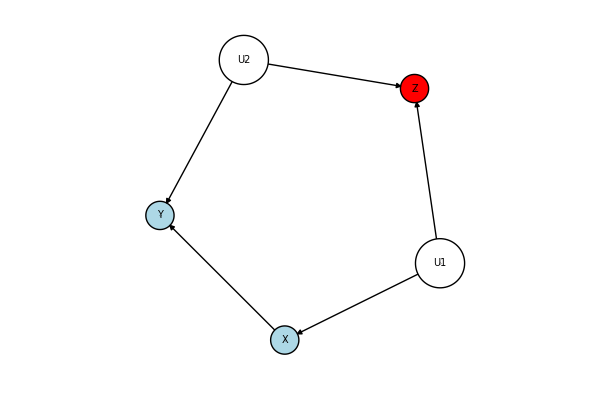

In [122]:
using GraphRecipes, Plots
g = [0 0 0 0 0;
     0 0 0 1 0;
     1 1 0 0 0;
     0 0 0 0 0;
     1 0 0 1 0]

graphplot(g, names=["Z","X","U1","Y","U2"], curvature_scalar=0, nodesize=0.2, nodeshape=:circle, nodecolor = [colorant"red",colorant"lightblue",colorant"white",colorant"lightblue",colorant"white"],method=:spring,arrow=1)

In [17]:
Random.seed!(123)
N = 1000 # number of data points

# define simple linear model with added noise
U_1 = rand(Normal(0, 1), N)
U_2 = rand(Normal(0, 1), N)

Z = 0.5*U_1 + 0.5*U_2 + rand(Normal(0, 1), N)
X = 2*U_1 + rand(Normal(0, 1), N)
Y = 3*X + 2*U_2 + rand(Normal(0, 1), N)

tb=DataFrame(U_1=U_1,U_2=U_2,Z=Z,X=X,Y=Y)

,U_1,U_2,Z,X,Y
,Float64,Float64,Float64,Float64,Float64
1,-0.645731,0.268734,0.924247,-1.1018,-1.53565
2,-1.46325,-0.668932,-0.865117,-2.9644,-10.8599
3,-1.6236,-0.776832,-1.45293,-2.83457,-10.3346
4,-0.217665,-0.259568,0.652171,-1.82862,-6.45966
5,0.492246,-1.79663,0.419892,0.679429,-1.68424
6,0.98098,-1.5037,-0.492508,2.97563,6.13719
7,0.0799568,-0.423561,-0.10876,-1.70642,-6.94829
8,1.54912,-0.584664,-0.398991,4.56595,13.6536
9,-1.34161,-1.19688,-0.447712,-4.09328,-13.9655


In [18]:
# Regressions
no_control = lm(@formula(Y ~ X), tb)        
using_control = lm(@formula(Y ~ X+Z), tb)    

# Summary results
regtable(no_control , using_control, renderSettings = asciiOutput(), estimformat = "%02.3f")


---------------------------------
                       Y         
              -------------------
                   (1)        (2)
---------------------------------
(Intercept)      0.044      0.008
               (0.068)    (0.064)
X             3.012***   2.888***
               (0.029)    (0.029)
Z                        0.666***
                          (0.055)
---------------------------------
Estimator          OLS        OLS
---------------------------------
N                1,000      1,000
R2               0.916      0.927
---------------------------------




### Case 2. Controlling or not for Z is equally bad

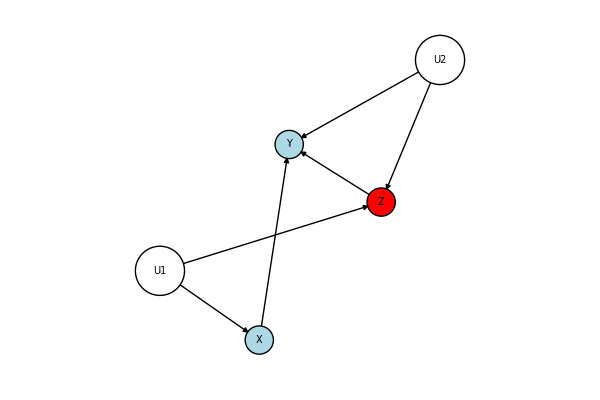

In [123]:
using GraphRecipes, Plots
g = [0 0 0 1 0;
     0 0 0 1 0;
     1 1 0 0 0;
     0 0 0 0 0;
     1 0 0 1 0]

graphplot(g, names=["Z","X","U1","Y","U2"], curvature_scalar=0, nodesize=0.2, nodeshape=:circle, nodecolor = [colorant"red",colorant"lightblue",colorant"white",colorant"lightblue",colorant"white"],method=:spring,arrow=1)

In [23]:
Random.seed!(123)
N = 1000 # number of data points

# define simple linear model with added noise
U_1 = rand(Normal(0, 1), N)
U_2 = rand(Normal(0, 1), N)

Z = 0.5*U_1 + 0.5*U_2 + rand(Normal(0, 1), N)
X = 2*U_1 + rand(Normal(0, 1), N)
Y = 3*X + 2*U_1 + 2*Z + rand(Normal(0, 1), N)

tb=DataFrame(U_1=U_1,U_2=U_2,Z=Z,X=X,Y=Y)

,U_1,U_2,Z,X,Y
,Float64,Float64,Float64,Float64,Float64
1,-0.645731,0.268734,0.924247,-1.1018,-1.51609
2,-1.46325,-0.668932,-0.865117,-2.9644,-14.1788
3,-1.6236,-0.776832,-1.45293,-2.83457,-14.934
4,-0.217665,-0.259568,0.652171,-1.82862,-5.07151
5,0.492246,-1.79663,0.419892,0.679429,3.7333
6,0.98098,-1.5037,-0.492508,2.97563,10.1215
7,0.0799568,-0.423561,-0.10876,-1.70642,-6.15878
8,1.54912,-0.584664,-0.398991,4.56595,17.1232
9,-1.34161,-1.19688,-0.447712,-4.09328,-15.1504


In [20]:
# Regressions
no_control = lm(@formula(Y ~ X), tb)        
using_control = lm(@formula(Y ~ X+Z), tb)    

# Summary results
regtable(no_control , using_control, renderSettings = asciiOutput(), estimformat = "%02.3f")


---------------------------------
                       Y         
              -------------------
                   (1)        (2)
---------------------------------
(Intercept)      0.122      0.007
               (0.089)    (0.043)
X             4.163***   3.762***
               (0.038)    (0.019)
Z                        2.159***
                          (0.037)
---------------------------------
Estimator          OLS        OLS
---------------------------------
N                1,000      1,000
R2               0.923      0.983
---------------------------------




## Model 8: neutral control (possibly good for precision)

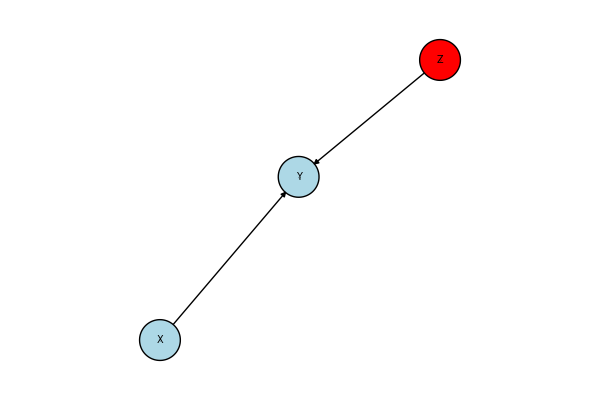

In [128]:
using GraphRecipes, Plots
g = [0 0 1;
     0 0 1;
     0 0 0]

graphplot(g, names=["Z","X","Y"], curvature_scalar=0, nodesize=0.2, nodeshape=:circle, nodecolor = [colorant"red",colorant"lightblue",colorant"lightblue"])

In [24]:
Random.seed!(123)
N = 1000 # number of data points

# define simple linear model with added noise

Z = rand(Normal(0, 1), N)
X = rand(Normal(0, 1), N)
Y = 3*X + 2*Z + rand(Normal(0, 1), N)

tb=DataFrame(Z=Z,X=X,Y=Y)

,Z,X,Y
,Float64,Float64,Float64
1,-0.645731,0.268734,0.627484
2,-1.46325,-0.668932,-4.73232
3,-1.6236,-0.776832,-5.83042
4,-0.217665,-0.259568,-0.323248
5,0.492246,-1.79663,-3.33332
6,0.98098,-1.5037,-2.7803
7,0.0799568,-0.423561,-1.04773
8,1.54912,-0.584664,0.463036
9,-1.34161,-1.19688,-5.45232


In [25]:
# Regressions
no_control = lm(@formula(Y ~ X), tb)        
using_control = lm(@formula(Y ~ X+Z), tb)    

# Summary results
regtable(no_control , using_control, renderSettings = asciiOutput(), estimformat = "%02.3f")


---------------------------------
                       Y         
              -------------------
                   (1)        (2)
---------------------------------
(Intercept)     -0.027      0.046
               (0.073)    (0.032)
X             3.005***   2.999***
               (0.076)    (0.034)
Z                        1.983***
                          (0.031)
---------------------------------
Estimator          OLS        OLS
---------------------------------
N                1,000      1,000
R2               0.609      0.923
---------------------------------




## Model 9: neutral control (possibly bad for precision)

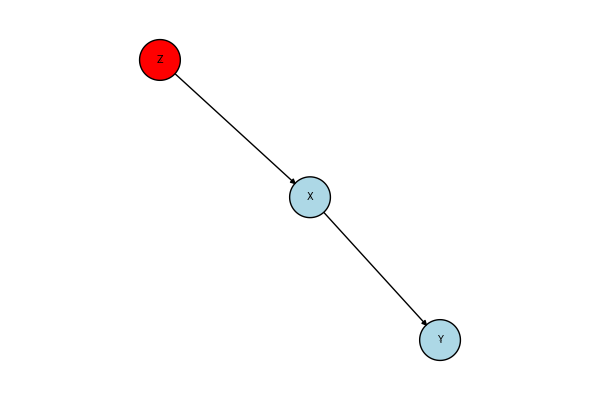

In [129]:
using GraphRecipes, Plots
g = [0 1 0;
     0 0 1;
     0 0 0]

graphplot(g, names=["Z","X","Y"], curvature_scalar=0, nodesize=0.2, nodeshape=:circle, nodecolor = [colorant"red",colorant"lightblue",colorant"lightblue"])

In [26]:
Random.seed!(123)
N = 1000 # number of data points

# define simple linear model with added noise

Z = rand(Normal(0, 1), N)
X = 2*Z + rand(Normal(0, 1), N)
Y = 3*X + rand(Normal(0, 1), N)

tb=DataFrame(Z=Z,X=X,Y=Y)

,Z,X,Y
,Float64,Float64,Float64
1,-0.645731,-1.02273,-1.95544
2,-1.46325,-3.59543,-10.5853
3,-1.6236,-4.02404,-12.3248
4,-0.217665,-0.694899,-1.19391
5,0.492246,-0.812141,-1.36434
6,0.98098,0.458256,1.14362
7,0.0799568,-0.263647,-0.727898
8,1.54912,2.51359,6.65953
9,-1.34161,-3.88009,-10.8188


In [27]:
# Regressions
no_control = lm(@formula(Y ~ X), tb)        
using_control = lm(@formula(Y ~ X+Z), tb)    

# Summary results
regtable(no_control , using_control, renderSettings = asciiOutput(), estimformat = "%02.3f")


---------------------------------
                       Y         
              -------------------
                   (1)        (2)
---------------------------------
(Intercept)      0.046      0.046
               (0.032)    (0.032)
X             2.993***   2.999***
               (0.014)    (0.034)
Z                          -0.014
                          (0.075)
---------------------------------
Estimator          OLS        OLS
---------------------------------
N                1,000      1,000
R2               0.978      0.978
---------------------------------




## Model 10: bad control (bias amplification)

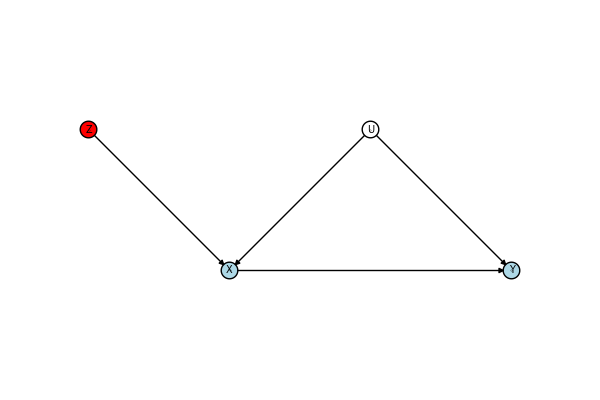

In [136]:
using GraphRecipes, Plots
g = [0 1 0 0;
     0 0 0 1;
     0 1 0 1;
     0 0 0 0]

graphplot(g, names=["Z","X","U","Y"], curvature_scalar=0, nodesize=0.2, nodeshape=:circle, nodecolor = [colorant"red",colorant"lightblue",colorant"white",colorant"lightblue"],arrow=1,x = [-1,0,1,2],y = [1,0,1,0])

In [29]:
Random.seed!(123)
N = 1000 # number of data points

# define simple linear model with added noise
U= rand(Normal(0, 1), N)
Z = rand(Normal(0, 1), N)
X = 0.5*Z + 2*U + rand(Normal(0, 1), N)
Y = 2*X + 3*U + rand(Normal(0, 1), N)

tb=DataFrame(U=U,Z=Z,X=X,Y=Y)

,U,Z,X,Y
,Float64,Float64,Float64,Float64
1,-0.645731,0.268734,-0.0443495,-1.83623
2,-1.46325,-0.668932,-3.05999,-10.5476
3,-1.6236,-0.776832,-3.88834,-12.2348
4,-0.217665,-0.259568,0.325673,-1.39494
5,0.492246,-1.79663,1.15826,3.4882
6,0.98098,-1.5037,0.978962,5.91454
7,0.0799568,-0.423561,0.0111756,-1.60411
8,1.54912,-0.584664,1.9247,9.96447
9,-1.34161,-1.19688,-2.46013,-10.3551


In [30]:
# Regressions
no_control = lm(@formula(Y ~ X), tb)        
using_control = lm(@formula(Y ~ X+Z), tb)    

# Summary results
regtable(no_control , using_control, renderSettings = asciiOutput(), estimformat = "%02.3f")


----------------------------------
                        Y         
              --------------------
                   (1)         (2)
----------------------------------
(Intercept)     -0.110      -0.101
               (0.058)     (0.056)
X             3.178***    3.226***
               (0.025)     (0.024)
Z                        -0.567***
                           (0.060)
----------------------------------
Estimator          OLS         OLS
----------------------------------
N                1,000       1,000
R2               0.942       0.947
----------------------------------




## Model 11: bad control (overcontrol bias)

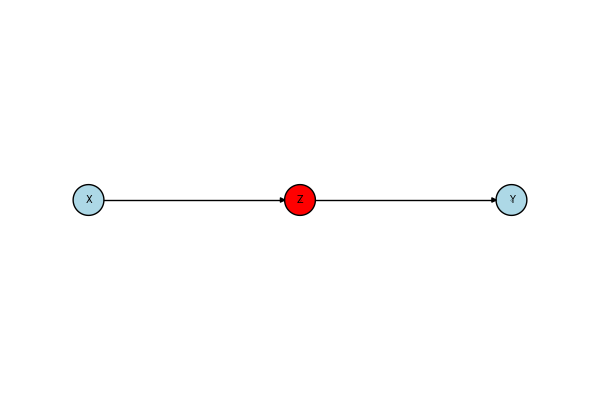

In [139]:
using GraphRecipes, Plots
g = [0 0 1;
     1 0 0;
     0 0 0]

graphplot(g, names=["Z","X","Y"], curvature_scalar=0, nodesize=0.2, nodeshape=:circle, nodecolor = [colorant"red",colorant"lightblue",colorant"lightblue"],x=[0,-1,1],y=[0,0,0])

In this case,  Z is a mediator of the causal effect of X on Y

In [31]:
Random.seed!(123)
N = 1000 # number of data points

# define simple linear model with added noise
X= rand(Normal(0, 1), N)
Z = 0.5*X + rand(Normal(0, 1), N)
Y = 2*Z + rand(Normal(0, 1), N)

tb=DataFrame(Z=Z,X=X,Y=Y)

,Z,X,Y
,Float64,Float64,Float64
1,-0.0541318,-0.645731,1.00448
2,-1.40056,-1.46325,-2.60014
3,-1.58863,-1.6236,-3.42998
4,-0.368401,-0.217665,0.153986
5,-1.55051,0.492246,-2.02893
6,-1.01321,0.98098,-2.25757
7,-0.383582,0.0799568,-0.704122
8,0.189898,1.54912,-0.501425
9,-1.86768,-1.34161,-2.91383


In [32]:
# Regressions
no_control = lm(@formula(Y ~ X), tb)        
using_control = lm(@formula(Y ~ X+Z), tb)    

# Summary results
regtable(no_control , using_control, renderSettings = asciiOutput(), estimformat = "%02.3f")


---------------------------------
                       Y         
              -------------------
                   (1)        (2)
---------------------------------
(Intercept)      0.076      0.046
               (0.068)    (0.032)
X             0.988***     -0.016
               (0.066)    (0.036)
Z                        1.999***
                          (0.034)
---------------------------------
Estimator          OLS        OLS
---------------------------------
N                1,000      1,000
R2               0.183      0.818
---------------------------------




## Model 12: bad control (overcontrol bias)

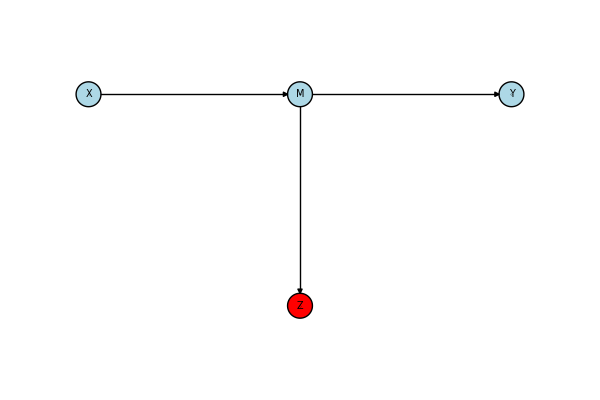

In [142]:
using GraphRecipes, Plots
g = [0 0 0 0;
     0 0 1 0;
     1 0 0 1;
     0 0 0 0]

graphplot(g, names=["Z","X","M","Y"], curvature_scalar=0, nodesize=0.2, nodeshape=:circle, nodecolor = [colorant"red",colorant"lightblue",colorant"lightblue",colorant"lightblue"],method=:spring,arrow=1,x=[0,-1,0,1],y=[-1,0,0,0])

In [34]:
Random.seed!(123)
N = 1000 # number of data points

# define simple linear model with added noise
X = rand(Normal(0, 1), N)
M = 4*X + rand(Normal(0, 1), N)
Z = 0.5*M + rand(Normal(0, 1), N)
Y = 2*M + rand(Normal(0, 1), N)

tb=DataFrame(M=M,Z=Z,X=X,Y=Y)

,M,Z,X,Y
,Float64,Float64,Float64,Float64
1,-2.31419,-0.0443495,-0.645731,-4.43871
2,-6.52194,-3.05999,-1.46325,-13.0818
3,-7.27125,-3.88834,-1.6236,-14.1299
4,-1.13023,0.325673,-0.217665,-3.65375
5,0.17235,1.15826,0.492246,0.039638
6,2.42022,0.978962,0.98098,5.85411
7,-0.103733,0.0111756,0.0799568,-2.0738
8,5.61183,1.9247,1.54912,12.6914
9,-6.56331,-2.46013,-1.34161,-14.5367


In [35]:
# Regressions
no_control = lm(@formula(Y ~ X), tb)        
using_control = lm(@formula(Y ~ X+Z), tb)    

# Summary results
regtable(no_control , using_control, renderSettings = asciiOutput(), estimformat = "%02.3f")


---------------------------------
                       Y         
              -------------------
                   (1)        (2)
---------------------------------
(Intercept)      0.010     -0.027
               (0.069)    (0.065)
X             8.062***   6.703***
               (0.067)    (0.130)
Z                        0.685***
                          (0.058)
---------------------------------
Estimator          OLS        OLS
---------------------------------
N                1,000      1,000
R2               0.936      0.944
---------------------------------




## Model 13 - Neutral Control (probably good for precision)

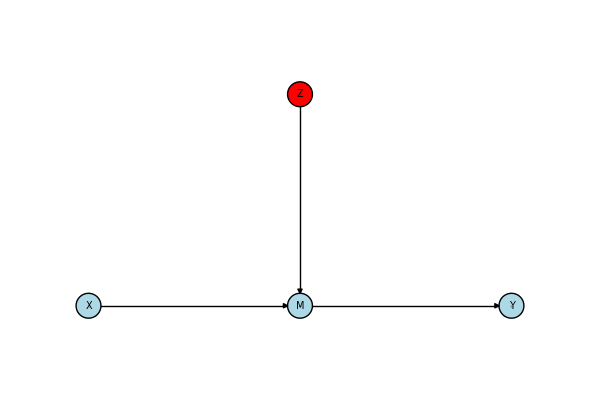

In [144]:
using GraphRecipes, Plots
g = [0 0 1 0;
     0 0 1 0;
     0 0 0 1;
     0 0 0 0]

graphplot(g, names=["Z","X","M","Y"], curvature_scalar=0, nodesize=0.2, nodeshape=:circle, nodecolor = [colorant"red",colorant"lightblue",colorant"lightblue",colorant"lightblue"],method=:spring,arrow=1,x=[0,-1,0,1],y=[1,0,0,0])

In [37]:
Random.seed!(123)
N = 1000 # number of data points

# define simple linear model with added noise
X = rand(Normal(0, 1), N)
Z = rand(Normal(0, 1), N)
M = 2*X + 3*Z + rand(Normal(0, 1), N)
Y = 2*M + rand(Normal(0, 1), N)

tb=DataFrame(M=M,Z=Z,X=X,Y=Y)

,M,Z,X,Y
,Float64,Float64,Float64,Float64
1,0.627484,0.268734,-0.645731,1.44463
2,-4.73232,-0.668932,-1.46325,-9.50254
3,-5.83042,-0.776832,-1.6236,-11.2482
4,-0.323248,-0.259568,-0.217665,-2.03979
5,-3.33332,-1.79663,0.492246,-6.9717
6,-2.7803,-1.5037,0.98098,-4.54692
7,-1.04773,-0.423561,0.0799568,-3.96178
8,0.463036,-0.584664,1.54912,2.39377
9,-5.45232,-1.19688,-1.34161,-12.3147


In [38]:
# Regressions
no_control = lm(@formula(Y ~ X), tb)        
using_control = lm(@formula(Y ~ X+Z), tb)    

# Summary results
regtable(no_control , using_control, renderSettings = asciiOutput(), estimformat = "%02.3f")


---------------------------------
                       Y         
              -------------------
                   (1)        (2)
---------------------------------
(Intercept)      0.162      0.071
               (0.195)    (0.070)
X             4.039***   4.024***
               (0.189)    (0.068)
Z                        6.040***
                          (0.074)
---------------------------------
Estimator          OLS        OLS
---------------------------------
N                1,000      1,000
R2               0.315      0.911
---------------------------------




## Models 14 and 15 – Neutral Controls (possibly helpful in the case of selection bias)


### Model 14

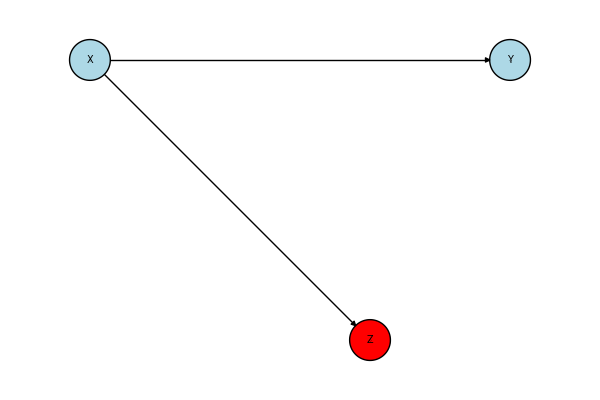

In [147]:
using GraphRecipes, Plots
g = [0 0 0;
     1 0 1;
     0 0 0]

graphplot(g, names=["Z","X","Y"], curvature_scalar=0, nodesize=0.2, nodeshape=:circle, nodecolor = [colorant"red",colorant"lightblue",colorant"lightblue"],x=[1,0,1.5],y=[-1,0,0])

In [39]:
Random.seed!(123)
N = 1000 # number of data points

# define simple linear model with added noise
X = rand(Normal(0, 1), N)
Z = 2*X + rand(Normal(0, 1), N)
Y = X + rand(Normal(0, 1), N)

tb=DataFrame(Z=Z,X=X,Y=Y)

,Z,X,Y
,Float64,Float64,Float64
1,-1.02273,-0.645731,0.467014
2,-3.59543,-1.46325,-1.26228
3,-4.02404,-1.6236,-1.87632
4,-0.694899,-0.217665,0.673123
5,-0.812141,0.492246,1.56433
6,0.458256,0.98098,0.749834
7,-0.263647,0.0799568,0.142999
8,2.51359,1.54912,0.667903
9,-3.88009,-1.34161,-0.520078


In [40]:
# Regressions
no_control = lm(@formula(Y ~ X), tb)        
using_control = lm(@formula(Y ~ X+Z), tb)    

# Summary results
regtable(no_control , using_control, renderSettings = asciiOutput(), estimformat = "%02.3f")


---------------------------------
                       Y         
              -------------------
                   (1)        (2)
---------------------------------
(Intercept)      0.046      0.046
               (0.032)    (0.032)
X             0.983***   0.986***
               (0.031)    (0.075)
Z                          -0.001
                          (0.034)
---------------------------------
Estimator          OLS        OLS
---------------------------------
N                1,000      1,000
R2               0.499      0.499
---------------------------------




### Model 15

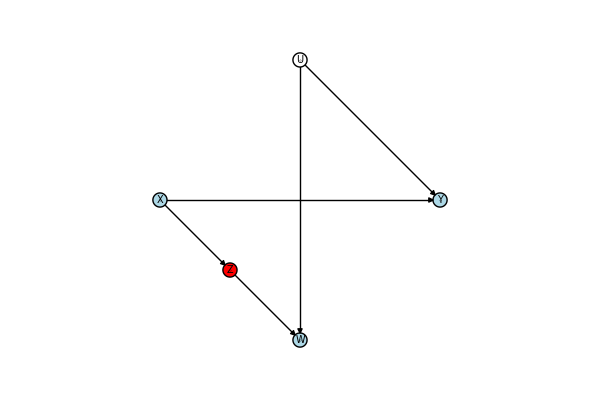

In [150]:
using GraphRecipes, Plots
g = [0 0 0 0 1;
     1 0 0 1 0;
     0 0 0 1 1;
     0 0 0 0 0;
     0 0 0 0 0]

graphplot(g, names=["Z","X","U","Y","W"], curvature_scalar=0, nodesize=0.2, nodeshape=:circle, nodecolor = [colorant"red",colorant"lightblue",colorant"white",colorant"lightblue",colorant"lightblue"],method=:spring,arrow=1,x=[-0.5,-1,0,1,0],y=[-0.5,0,1,0,-1])

In [42]:
Random.seed!(123)
N = 1000 # number of data points

# define simple linear model with added noise
U = rand(Normal(0, 1), N) # generate U
X = rand(Normal(0, 1), N) # generate X
Z = 2*X + rand(Normal(0, 1), N)
W = Z + 3*U 
Y = X + 2.5*U + rand(Normal(0, 1), N)

tb=DataFrame(Z=Z,X=X,Y=Y,W=W,U=U)

,Z,X,Y,W,U
,Float64,Float64,Float64,Float64,Float64
1,1.65021,0.268734,-1.15593,-0.28698,-0.645731
2,-1.13689,-0.668932,-4.36495,-5.52664,-1.46325
3,-1.80638,-0.776832,-4.4232,-6.67719,-1.6236
4,0.371651,-0.259568,-2.19702,-0.281344,-0.217665
5,-2.52118,-1.79663,-0.871081,-1.04444,0.492246
6,-3.23855,-1.5037,1.96242,-0.295614,0.98098
7,-0.784079,-0.423561,-2.09,-0.544208,0.0799568
8,-2.05055,-0.584664,4.75585,2.59682,1.54912
9,-1.57222,-1.19688,-5.96096,-5.59705,-1.34161


In [43]:
# Regressions
no_control = lm(@formula(Y ~ X), tb)        
using_control = lm(@formula(Y ~ X+Z), tb)    

# Summary results
regtable(no_control , using_control, renderSettings = asciiOutput(), estimformat = "%02.3f")


---------------------------------
                       Y         
              -------------------
                   (1)        (2)
---------------------------------
(Intercept)     -0.115     -0.111
               (0.090)    (0.090)
X             1.050***   1.246***
               (0.094)    (0.199)
Z                          -0.098
                          (0.088)
---------------------------------
Estimator          OLS        OLS
---------------------------------
N                1,000      1,000
R2               0.111      0.112
---------------------------------




## Models 16 and 17 – Bad Controls (selection bias)

### Model 16

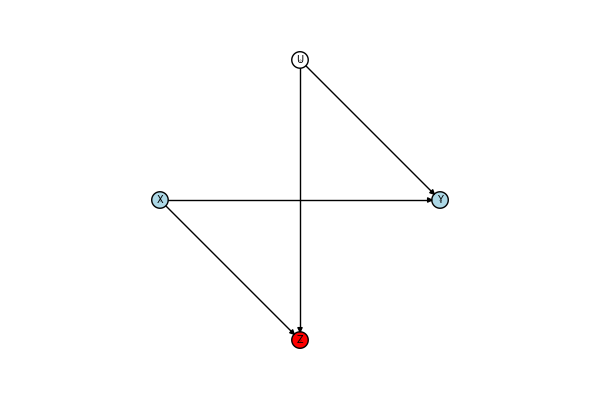

In [153]:
using GraphRecipes, Plots
g = [0 0 0 0;
     1 0 0 1;
     1 0 0 1;
     0 0 0 0]

graphplot(g, names=["Z","X","U","Y"], curvature_scalar=0, nodesize=0.2, nodeshape=:circle, nodecolor = [colorant"red",colorant"lightblue",colorant"white",colorant"lightblue"],method=:spring,arrow=1,x=[0,-1,0,1],y=[-1,0,1,0])

In [46]:
Random.seed!(123)
N = 1000 # number of data points

# define simple linear model with added noise
U = rand(Normal(0, 1), N) # generate U
X = rand(Normal(0, 1), N) # generate X
Z = 2*X + U + rand(Normal(0, 1), N)
Y = X + 2.5*U + rand(Normal(0, 1), N)

tb=DataFrame(Z=Z,X=X,Y=Y,U=U)

,Z,X,Y,U
,Float64,Float64,Float64,Float64
1,1.00448,0.268734,-1.15593,-0.645731
2,-2.60014,-0.668932,-4.36495,-1.46325
3,-3.42998,-0.776832,-4.4232,-1.6236
4,0.153986,-0.259568,-2.19702,-0.217665
5,-2.02893,-1.79663,-0.871081,0.492246
6,-2.25757,-1.5037,1.96242,0.98098
7,-0.704122,-0.423561,-2.09,0.0799568
8,-0.501425,-0.584664,4.75585,1.54912
9,-2.91383,-1.19688,-5.96096,-1.34161


In [47]:
# Regressions
no_control = lm(@formula(Y ~ X), tb)        
using_control = lm(@formula(Y ~ X+Z), tb)    

# Summary results
regtable(no_control , using_control, renderSettings = asciiOutput(), estimformat = "%02.3f")


----------------------------------
                        Y         
              --------------------
                   (1)         (2)
----------------------------------
(Intercept)     -0.115      -0.128
               (0.090)     (0.068)
X             1.050***   -1.493***
               (0.094)     (0.119)
Z                         1.271***
                           (0.047)
----------------------------------
Estimator          OLS         OLS
----------------------------------
N                1,000       1,000
R2               0.111       0.483
----------------------------------




### Model 17

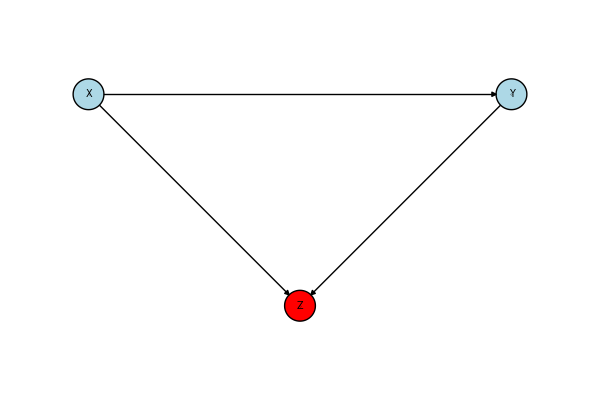

In [156]:
using GraphRecipes, Plots
g = [0 0 0;
     1 0 1;
     1 0 0]

graphplot(g, names=["Z","X","Y"], curvature_scalar=0, nodesize=0.2, nodeshape=:circle, nodecolor = [colorant"red",colorant"lightblue",colorant"lightblue"],x=[0,-1,1],y=[0,1,1])

In [48]:
Random.seed!(123)
N = 1000 # number of data points

# define simple linear model with added noise
X = rand(Normal(0, 1), N) # generate X
Y = X + rand(Normal(0, 1), N)
Z = 2*X + 3*Y + rand(Normal(0, 1), N)

tb=DataFrame(Z=Z,X=X,Y=Y)

,Z,X,Y
,Float64,Float64,Float64
1,-1.30971,-0.645731,-0.376997
2,-9.12208,-1.46325,-2.13218
3,-10.7012,-1.6236,-2.40044
4,-0.976243,-0.217665,-0.477234
5,-1.85658,0.492246,-1.30439
6,0.162642,0.98098,-0.522724
7,-0.807855,0.0799568,-0.343604
8,5.11041,1.54912,0.964461
9,-9.47714,-1.34161,-2.53849


In [49]:
# Regressions
no_control = lm(@formula(Y ~ X), tb)        
using_control = lm(@formula(Y ~ X+Z), tb)    

# Summary results
regtable(no_control , using_control, renderSettings = asciiOutput(), estimformat = "%02.3f")


----------------------------------
                        Y         
              --------------------
                   (1)         (2)
----------------------------------
(Intercept)      0.015      -0.012
               (0.030)     (0.010)
X             1.003***   -0.473***
               (0.029)     (0.019)
Z                         0.296***
                           (0.003)
----------------------------------
Estimator          OLS         OLS
----------------------------------
N                1,000       1,000
R2               0.543       0.948
----------------------------------




## Model 18 – Bad Control (case-control bias)


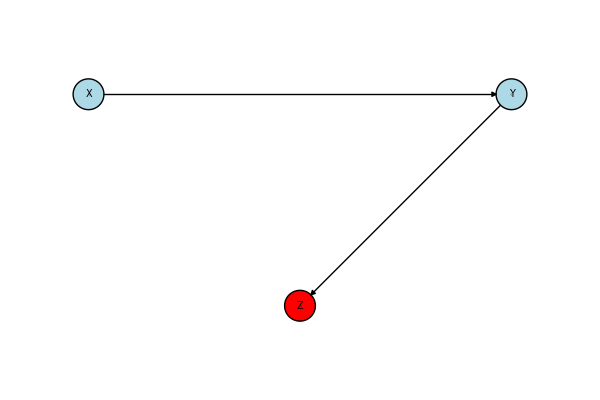

In [157]:
using GraphRecipes, Plots
g = [0 0 0;
     0 0 1;
     1 0 0]

graphplot(g, names=["Z","X","Y"], curvature_scalar=0, nodesize=0.2, nodeshape=:circle, nodecolor = [colorant"red",colorant"lightblue",colorant"lightblue"],x=[0,-1,1],y=[0,1,1])

In [50]:
Random.seed!(123)
N = 1000 # number of data points

# define simple linear model with added noise
X = rand(Normal(0, 1), N) # generate X
Y = X + rand(Normal(0, 1), N)
Z = 3*Y + rand(Normal(0, 1), N)

tb=DataFrame(Z=Z,X=X,Y=Y)

,Z,X,Y
,Float64,Float64,Float64
1,-0.0182463,-0.645731,-0.376997
2,-6.19558,-1.46325,-2.13218
3,-7.45402,-1.6236,-2.40044
4,-0.540913,-0.217665,-0.477234
5,-2.84107,0.492246,-1.30439
6,-1.79932,0.98098,-0.522724
7,-0.967769,0.0799568,-0.343604
8,2.01216,1.54912,0.964461
9,-6.79393,-1.34161,-2.53849


In [51]:
# Regressions
no_control = lm(@formula(Y ~ X), tb)        
using_control = lm(@formula(Y ~ X+Z), tb)    

# Summary results
regtable(no_control , using_control, renderSettings = asciiOutput(), estimformat = "%02.3f")


---------------------------------
                       Y         
              -------------------
                   (1)        (2)
---------------------------------
(Intercept)      0.015     -0.012
               (0.030)    (0.010)
X             1.003***   0.118***
               (0.029)    (0.014)
Z                        0.296***
                          (0.003)
---------------------------------
Estimator          OLS        OLS
---------------------------------
N                1,000      1,000
R2               0.543      0.948
---------------------------------


